In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
import pandas as pd
import io
df = pd.read_csv('Restaurant.csv',usecols=['Name','Rating','Tweet','cuisines','Sentiment','Current_Rating'] )


In [3]:
df.head()

,Name,Rating,Tweet,cuisines,Sentiment,Current_Rating
0,Sandwich Shop,3.5,Average safe food. Not got ill. #FOODSAFE,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.5
1,Sandwich Shop,2.8,Chicken inside the sandwich was #rotten and wa...,"North Indian, European, Mediterranean, BBQ, Kebab",1,2.8
2,Sandwich Shop,4.0,#SouthIndian sambhar tasted fantastic. Got eas...,"North Indian, European, Mediterranean, BBQ, Kebab",1,4.0
3,Sandwich Shop,2.0,#VEGMEAL took life of 5 children. #FOODSAFETY,"North Indian, European, Mediterranean, BBQ, Kebab",0,2.0
4,San Churro Cafe,3.2,#SouthIndian bada caused me #StomachAche and #...,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.2


In [4]:
df.shape

(3013, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3013 non-null   object 
 1   Rating          3013 non-null   float64
 2   Tweet           3013 non-null   object 
 3   cuisines        2835 non-null   object 
 4   Sentiment       3013 non-null   int64  
 5   Current_Rating  3013 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 141.4+ KB


In [6]:
df.describe()

,Rating,Sentiment,Current_Rating
count,3013.000000,3013.000000,3013.000000
mean,3.462595,0.563890,3.471557
std,1.052029,0.495984,1.060794
min,1.700000,0.000000,1.700000
25%,2.300000,0.000000,2.300000
50%,3.700000,1.000000,3.700000
75%,4.000000,1.000000,4.000000
max,5.000000,1.000000,5.000000


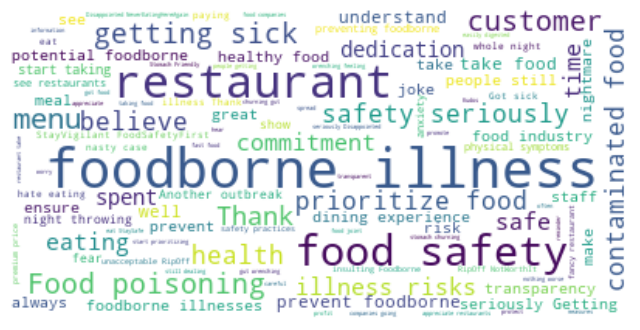

In [7]:
text = " ".join([x for x in df.Tweet])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

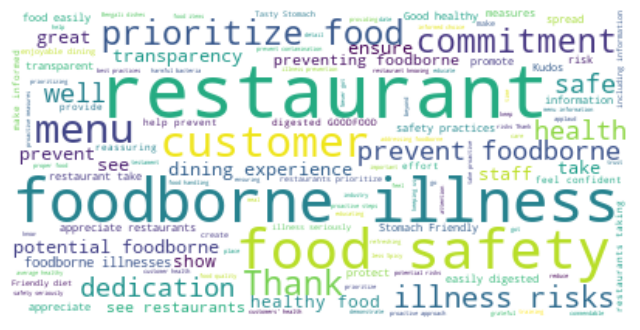

In [8]:
## for positive

text = " ".join([x for x in df.Tweet[df.Sentiment==1]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

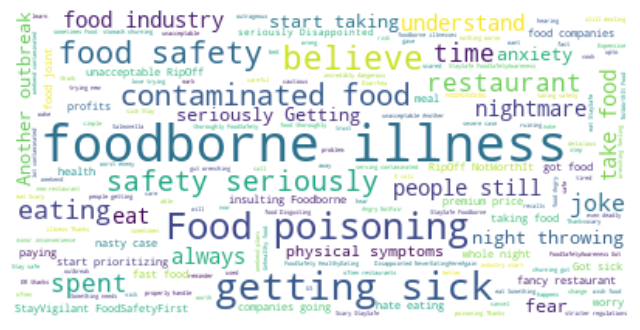

In [9]:
## for negative

text = " ".join([x for x in df.Tweet[df.Sentiment==0]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

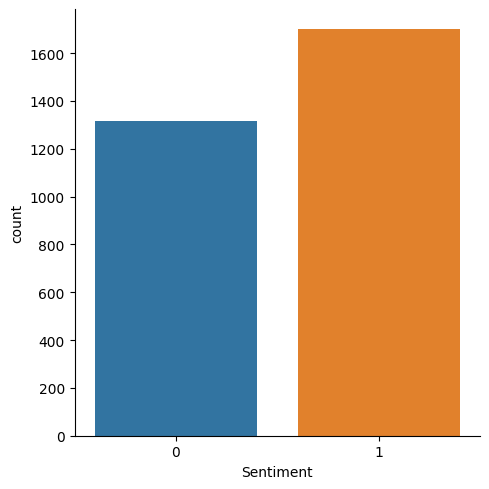

In [10]:
sns.catplot(data=df, kind='count', x='Sentiment')

In [11]:
df['Sentiment'].value_counts()

1    1699
0    1314
Name: Sentiment, dtype: int64

In [12]:
train,test = train_test_split(df,test_size = 0.2)

In [13]:
!pip install simpletransformers


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from simpletransformers.classification import ClassificationModel
# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=2, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [15]:
# 0,1 : positive,negative
def making_label(st):
    if(st==1):
        return 1
    else:
        return 0
    
train['label'] = train['Sentiment'].apply(making_label)
test['label'] = test['Sentiment'].apply(making_label)
print(train.shape)

(2410, 7)


In [16]:
train_df = pd.DataFrame({
    'Tweet': train['Tweet'][:3000].replace(r'\n', ' ', regex=True),
    'Sentiment': train['label'][:3000]
})

test_df = pd.DataFrame({
    'Tweet': test['Tweet'][-603:].replace(r'\n', ' ', regex=True),
    'Sentiment': test['label'][-603:]
})

In [17]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 2656 to 2526
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      603 non-null    object
 1   Sentiment  603 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.1+ KB
None


In [18]:
model.train_model(train_df)

C:\Python310\lib\site-packages\simpletransformers\classification\classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2410 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/302 [00:00<?, ?it/s]

(302, 0.21154996437800813)

In [19]:
result, model_outputs, wrong_predictions = model.eval_model(test_df)

C:\Python310\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/603 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/76 [00:00<?, ?it/s]

In [20]:
result

{'mcc': 0.9459514269578553,
 'tp': 338,
 'tn': 249,
 'fp': 11,
 'fn': 5,
 'auroc': 0.9982339089481947,
 'auprc': 0.9986568679567559,
 'eval_loss': 0.07292370378395151}

In [21]:
model_outputs

array([[-3.60886717,  3.68329597],
       [-3.73253059,  3.57031584],
       [-3.71239614,  3.72181034],
       ...,
       [-3.71059418,  3.64401746],
       [ 3.08230472, -3.5627954 ],
       [-3.05419612,  3.0235126 ]])

In [22]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [23]:
true = test_df['Sentiment'].tolist()
predicted = lst

In [24]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[249,  11],
       [  5, 338]], dtype=int64)

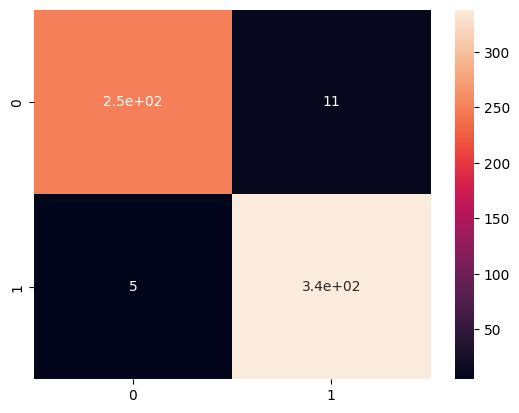

In [32]:
df_cm = pd.DataFrame(mat, range(2), range(2))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [31]:
sklearn.metrics.accuracy_score(true,predicted)

0.9734660033167496

In [27]:
from sklearn.metrics import classification_report
print(classification_report(true,predicted ))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       260
           1       0.97      0.99      0.98       343

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



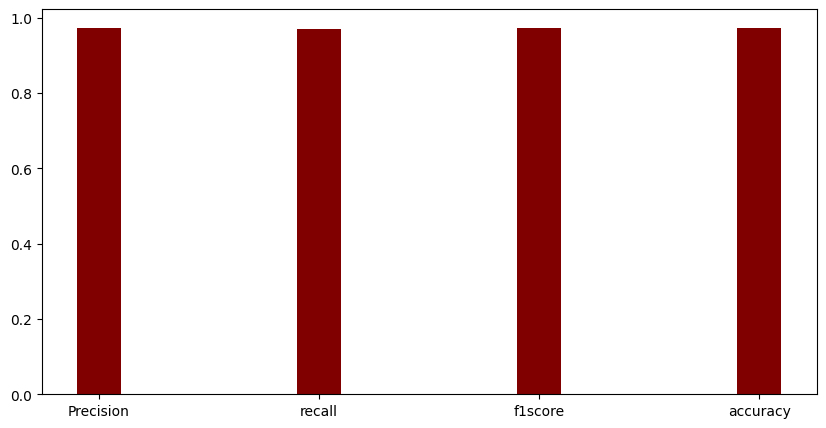

In [28]:
from sklearn.metrics import classification_report
report = classification_report(true, predicted, output_dict=True )
macro_precision=  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
accuracy = report['accuracy']
from sklearn.metrics import precision_recall_fscore_support as score
data = {'Precision':macro_precision, 'recall':macro_recall, 'f1score':macro_f1,'accuracy':accuracy}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',width = 0.2)
plt.show()

In [29]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative'}
    return sentiment_dict[pos]
    

In [30]:
print("Enter Tweet")
statement =input()
print("Enter Resturant Name")
resturant_name=input()
final_rating=df[df["Name"]==resturant_name]
y=final_rating['Current_Rating']
print('rating before testing=',y)
x1=get_result(statement)
print(x1)
if(x1=='negative'):
  y=y-0.5
else:
   y=y+0.5
print('After testing=',y)
df1=y.mean()
print('Average',df1)

Enter Tweet
good fod
Enter Resturant Name
Sandwich Shop
rating before testing= 0       3.5
1       2.8
2       4.0
3       2.0
619     5.0
620     5.0
621     4.0
622     4.0
1184    2.8
1185    2.8
1186    2.8
1187    2.8
2325    4.0
2326    4.0
2327    5.0
2328    5.0
Name: Current_Rating, dtype: float64


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative
After testing= 0       3.0
1       2.3
2       3.5
3       1.5
619     4.5
620     4.5
621     3.5
622     3.5
1184    2.3
1185    2.3
1186    2.3
1187    2.3
2325    3.5
2326    3.5
2327    4.5
2328    4.5
Name: Current_Rating, dtype: float64
Average 3.21875
